# Ferrari Stock vs. Tesla Stock

## Business Problem:
Both car manufacturers Ferrari and Tesla are publicly traded companies, but if we consider the public image that these two companies have taken on over the lifetime of their careers, we should be able to determine which car company has in effect been more "successful" longterm and what circumstances may or may not influence public image of each car company.

## Exploratory Data Analysis

In [1]:
# import pandas and datasets
import pandas as pd

Ferrari = 'https://raw.githubusercontent.com/joshstruggles/Ferrari-v-Tesla/main/data/Ferrari.csv'
Tesla = 'https://raw.githubusercontent.com/joshstruggles/Ferrari-v-Tesla/main/data/Tesla.csv'

df_Ferrari = pd.read_csv(Ferrari)
df_Tesla = pd.read_csv(Tesla)

print(df_Ferrari.head())
print()
print(df_Tesla.head())

         Date       Open       High        Low      Close  Adj Close   Volume
0  2015-10-22  57.070000  58.200001  55.700001  56.750000  53.604126  4545100
1  2015-10-23  57.770000  58.000000  56.270000  56.380001  53.254635  1967600
2  2015-10-26  57.000000  57.000000  54.540001  55.020000  51.970028  1466300
3  2015-10-27  54.799999  54.990002  49.360001  53.849998  50.864880  5949200
4  2015-10-28  54.020000  54.160000  50.099998  51.869999  48.994644  2411300

         Date       Open       High        Low      Close  Adj Close    Volume
0  2015-10-22  14.104000  14.383333  13.960000  14.114667  14.114667  42378000
1  2015-10-23  14.333333  14.356667  13.846000  13.939333  13.939333  63532500
2  2015-10-26  14.092000  14.392000  14.000000  14.350667  14.350667  50871000
3  2015-10-27  14.322667  14.473333  13.834000  14.023333  14.023333  52791000
4  2015-10-28  14.087333  14.230000  13.886667  14.197333  14.197333  40929000


In [2]:
print(df_Ferrari.tail())
print()
print(df_Tesla.tail())

            Date        Open        High         Low       Close   Adj Close  \
1880  2023-04-13  283.000000  284.859985  279.720001  282.940002  282.940002   
1881  2023-04-14  284.940002  286.609985  284.350006  285.529999  285.529999   
1882  2023-04-17  280.619995  281.399994  277.920013  281.040009  281.040009   
1883  2023-04-18  280.140015  281.640015  278.925995  280.600006  280.600006   
1884  2023-04-19  279.959991  280.190002  278.220001  278.630005  278.630005   

      Volume  
1880  679800  
1881  462000  
1882  337500  
1883  309300  
1884  271900  

            Date        Open        High         Low       Close   Adj Close  \
1880  2023-04-13  182.960007  186.500000  180.940002  185.899994  185.899994   
1881  2023-04-14  183.949997  186.279999  182.009995  185.000000  185.000000   
1882  2023-04-17  186.320007  189.690002  182.690002  187.039993  187.039993   
1883  2023-04-18  187.149994  187.690002  183.580002  184.309998  184.309998   
1884  2023-04-19  179.100006

While we aren't necessarily interested in the performance of stocks on a daily basis per se, we will be looking at their performance in a a more general sense. We will create variables based on the datasets we have now that exclude:

- High
- Low
- Adj Close
- Volume

In [3]:
# drop columns mentioned in markdown above from both Ferrari and Tesla
df_Ferrari.drop(columns = ['High', 'Low', 'Adj Close', 'Volume'], inplace = True)
df_Tesla.drop(columns = ['High', 'Low', 'Adj Close', 'Volume'], inplace = True)

In [4]:
print(df_Ferrari.head())
print()
print(df_Tesla.head())

         Date       Open      Close
0  2015-10-22  57.070000  56.750000
1  2015-10-23  57.770000  56.380001
2  2015-10-26  57.000000  55.020000
3  2015-10-27  54.799999  53.849998
4  2015-10-28  54.020000  51.869999

         Date       Open      Close
0  2015-10-22  14.104000  14.114667
1  2015-10-23  14.333333  13.939333
2  2015-10-26  14.092000  14.350667
3  2015-10-27  14.322667  14.023333
4  2015-10-28  14.087333  14.197333


In [5]:
print("Ferrari's highest opening: {}".format(df_Ferrari['Open'].max()))
print("Ferrari's lowest opening: {}".format(df_Ferrari['Open'].min()))
print()
print("Tesla's highest opening: {}".format(df_Tesla['Open'].max()))
print("Tesla's lowest opening: {}".format(df_Tesla['Open'].min()))
print()
print("Ferrari's median opening stock price: {}".format(df_Ferrari['Open'].median()))
print("Tesla's median opening stock price: {}".format(df_Tesla['Open'].median()))

Ferrari's highest opening: 284.940002
Ferrari's lowest opening: 32.290001

Tesla's highest opening: 411.470001
Tesla's lowest opening: 9.488

Ferrari's median opening stock price: 151.5
Tesla's median opening stock price: 23.309999


Tesla historically has had higher opening highs than Ferrari, but also lower lows and lower median prices. So what's going on with Tesla stock?

Let's see if there are any huge discrepancies between highest and lowest opening and __closing__ prices to see if there are daily events that have influenced stock price changes throughout the day.

In [6]:
print("Ferrari's highest close: {}".format(df_Ferrari['Close'].max()))
print("Ferrari's lowest close: {}".format(df_Ferrari['Close'].min()))
print()
print("Tesla's highest close: {}".format(df_Tesla['Close'].max()))
print("Tesla's lowest close: {}".format(df_Tesla['Close'].min()))
print()
print("Ferrari's median closing stock price: {}".format(df_Ferrari['Close'].median()))
print("Tesla's median closing stock price: {}".format(df_Tesla['Close'].median()))

Ferrari's highest close: 285.529999
Ferrari's lowest close: 32.0

Tesla's highest close: 409.970001
Tesla's lowest close: 9.578

Ferrari's median closing stock price: 151.039993
Tesla's median closing stock price: 23.290001


In [7]:
df_Ferrari.drop(columns = ['Open'], inplace = True)
df_Tesla.drop(columns = ['Open'], inplace = True)

We can say that there wasn't any huge event in one day's time that influenced the closing price of a stock. Let's open a visual of each car manufacturer's stock and see if we can view other insights into each.

In [8]:
df_Ferrari['Date'] = pd.to_datetime(df_Ferrari['Date'])
df_Tesla['Date'] = pd.to_datetime(df_Tesla['Date'])

In [12]:
df_Ferrari = df_Ferrari.set_index('Date')

In [13]:
df_Tesla = df_Tesla.set_index('Date')

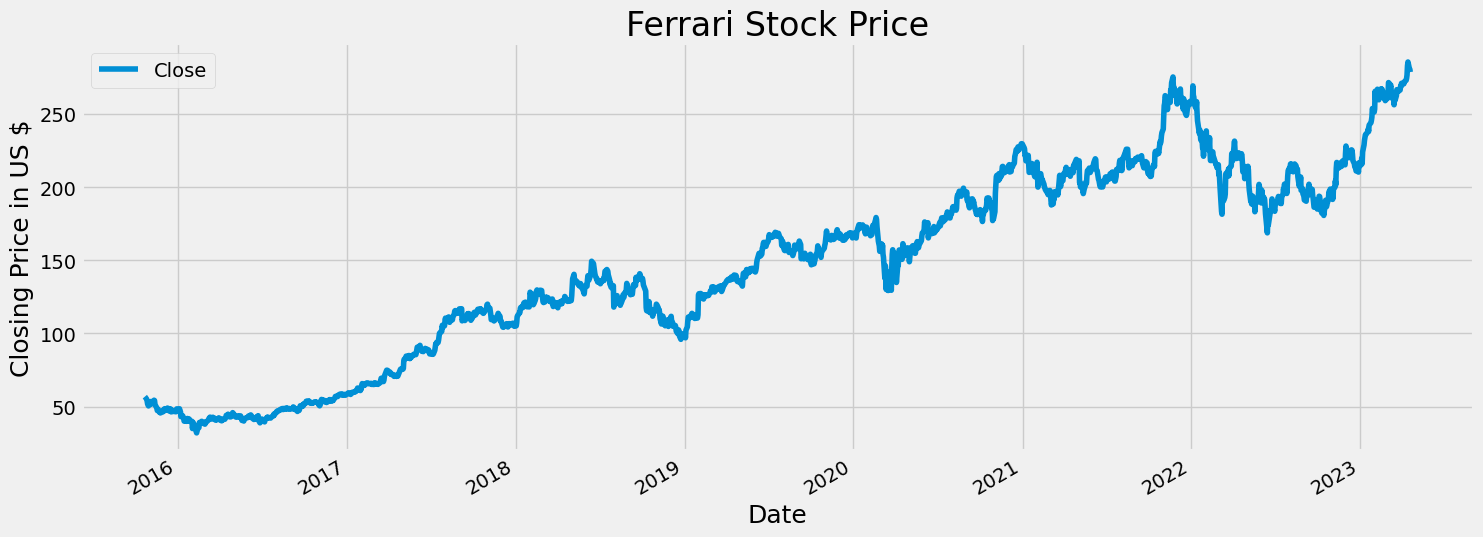

In [14]:
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

ferrari = df_Ferrari.sort_index()

ferrari.plot(figsize = (16, 6))
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closing Price in US $', fontsize = 18)
plt.title('Ferrari Stock Price', fontsize = 24)
plt.show();

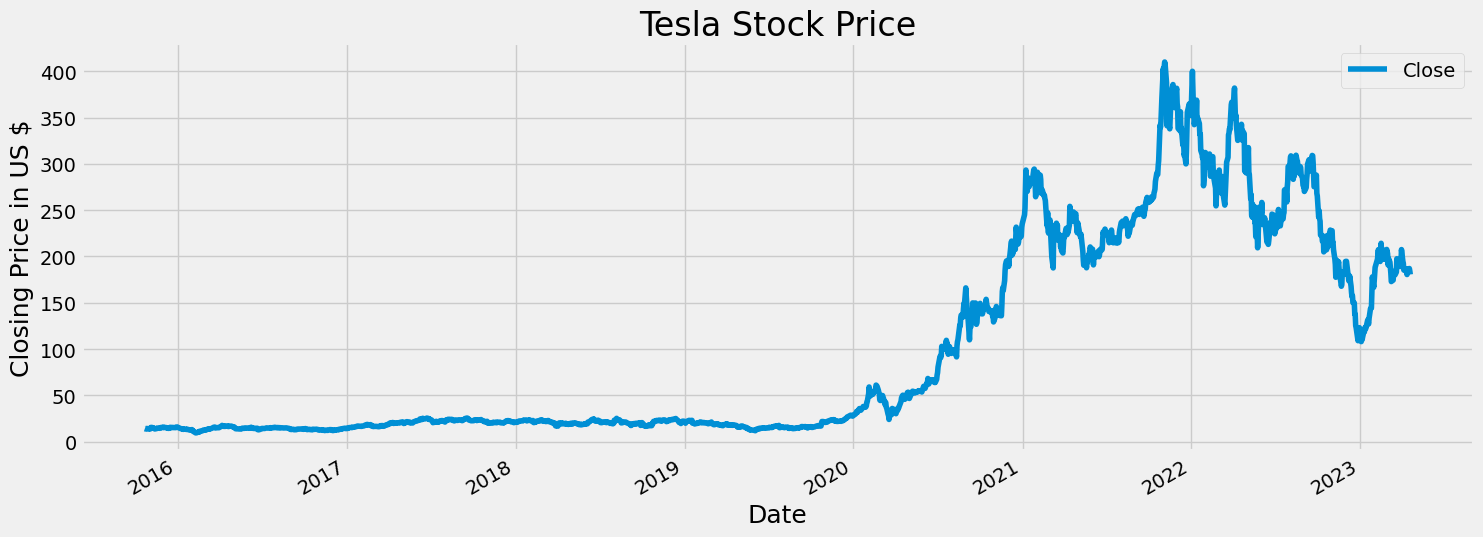

In [15]:
tesla = df_Tesla.sort_index()

tesla.plot(figsize = (16,6))
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closing Price in US $', fontsize = 18)
plt.title('Tesla Stock Price', fontsize = 24)
plt.show();